In [19]:
# Compares UFO signtings and sunspot activity (sunspot counts)
# monthly data from 1997 - 2016 

# Test for patterns UFO sightings and sunspot counts with auto-correlation
# Cross-correlate UFO and sunspot frequency 
# Test coherence between the UFo and sunspot activity at diff. frequencies
# Granger test of sunspot -> UFO sighting causality
# See http://www.rense.com/general3/sunufo.htm

import numpy as np
import pandas as pd
from scipy import signal
import statsmodels.tsa.stattools
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-darkgrid')

In [20]:
sunspots = pd.read_csv('data_sunspots.csv')# http://sidc.oma.be/silso/newdataset 
sunspots['Date'] = pd.to_datetime((sunspots.YEAR*10000+sunspots.MONTH*100+sunspots.DAY).apply(str),format='%Y%m%d')
df2 = sunspots.sort_index()
df2 = df2[(df2['Date'] > '1997-01-30') & (df2['Date'] <= '2016-12-31')]
ufo = pd.read_csv('NUFORC-SIGHTINGS.csv') # load UFO data http://www.nuforc.org/webreports.html
df1 = ufo.sort_index()
df1 = df1[(df1['Reports'] > '1997-01-30') & (df1['Reports'] <= '2016-12-31')]
df1['Date'] = pd.to_datetime((df1.Reports))
df1 = df1.sort_index()

In [21]:
s.Date = pd.to_datetime(sunspots.Date)
s = s.sort_index()
s_month = s.groupby(['YEAR','MONTH'])['Snvalue','Snerror','Nb','C3', 'Date'].mean() 

In [22]:
# Reformat sunspot data by month
s_month.sort_index()
sc0 = np.array(s_month.Snvalue)
sc0 = pd.Series(sc0)
sc1 = np.array(s_month.Snerror)
sc1 = pd.Series(sc1)
sc2 = np.array(s_month.Nb)
sc2 = pd.Series(sc2)
sc3 = np.array(s_month.C3)
sc3 = pd.Series(sc3)

In [23]:
df_main_s = df1
df_main_s['Snvalue'] = sc0
df_main_s['Snerror'] = sc1
df_main_s['Nb'] = sc2
df_main_s['C3'] = sc3
df = df_main_s

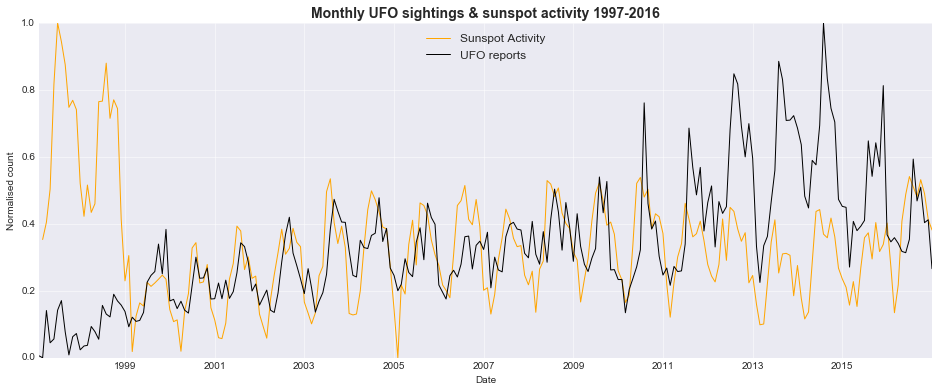

In [24]:
#Plot counts of sunspots & UFO sightings over 20 years
plt.figure(figsize=(16,6))
X = df.Date
Y1 = df.Count
Y2 = df.Snvalue
Y3 = df.Snerror
Y4 = df.Nb
Y5 = df.C3
#Normalise to min/max
Y1 = (Y1-min(Y1))/(max(Y1)-min(Y1))
Y2 = (Y2-min(Y2))/(max(Y2)-min(Y2))
Y3 = (Y3-min(Y3))/(max(Y3)-min(Y3))
Y4 = (Y4-min(Y4))/(max(Y4)-min(Y4))
Y5 = (Y5-min(Y5))/(max(Y5)-min(Y5))
# Draw plot
plt.plot(X,Y4,color='orange',alpha=1, label='Sunspot Activity')
plt.plot(X,Y1,color='k', label='UFO reports')
plt.title('Monthly UFO sightings & sunspot activity 1997-2016', fontsize=14, fontweight='bold')
plt.ylabel('Normalised count')
plt.xlabel('Date')
plt.legend(loc='upper center')
plt.savefig('./imgs/UFOsunspots_1997-2016.png')
plt.show()

In [25]:
sum(df.Count)

96404.0

-0.000473704604696


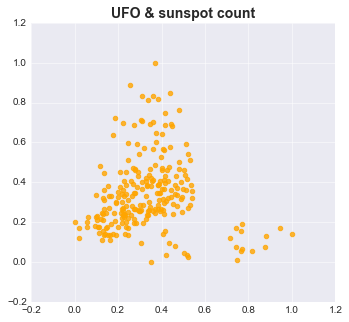

In [26]:
# Scatter Plot of UFO signtings against solar activity
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(Y4,Y1,color='orange',alpha=.8, label='UFO - s3')
plt.title('UFO & sunspot count', fontsize=14, fontweight='bold')
print Y1.corr(Y4)

/Users/aparker/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


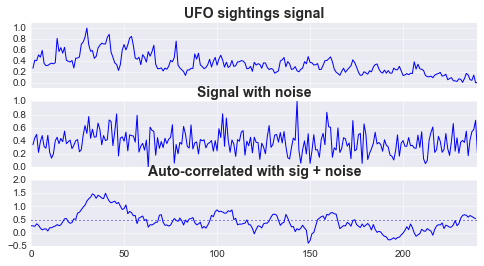

In [27]:
#Auto-correlation
sig = Y1.sort_index()

noise = np.random.randn(len(sig))
noise_norm = (noise-min(noise))/(max(noise)-min(noise))
sig_noise = sig + noise

sig_noise_norm = (sig_noise-min(sig_noise))/(max(sig_noise)-min(sig_noise))
corr = signal.correlate(sig_noise, np.ones(12), mode='same') / 12
#corr = signal.correlate(sig_noise_norm, sig, mode='same') 

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True, figsize=(8,4))

ax_orig.plot(sig,color='b')
ax_orig.set_title('UFO sightings signal', fontsize=14, fontweight='bold')

ax_noise.plot(sig_noise_norm)
ax_noise.set_title('Signal with noise', fontsize=14, fontweight='bold')

ax_corr.plot(corr)
ax_corr.axhline(0.5, ls=':')
#ax_corr.set_ylim(0,1)
ax_corr.set_title('Auto-correlated with sig + noise', fontsize=14, fontweight='bold')

ax_orig.margins(0, 0.1)
#fig.tight_layout()
fig.show()

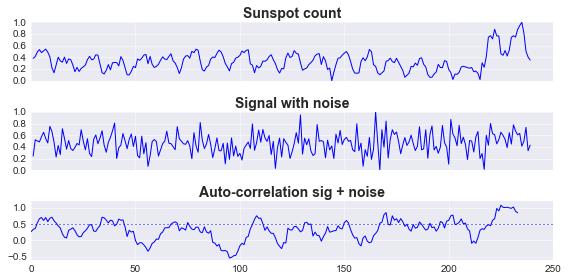

In [28]:
#Auto-correlation
sig = Y4.sort_index()

noise = np.random.randn(len(sig))
noise1 = np.random.randn(len(sig))
noise_norm = (noise-min(noise))/(max(noise)-min(noise))
sig_noise = sig + noise

sig_noise_norm = (sig_noise-min(sig_noise))/(max(sig_noise)-min(sig_noise))
corr = signal.correlate(sig_noise, np.ones(12), mode='same') / 12
#corr = signal.correlate(sig, sig, mode='same') 

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True, figsize=(8,4))

ax_orig.plot(sig)
ax_orig.set_title('Sunspot count', fontsize=14, fontweight='bold')

ax_noise.plot(sig_noise_norm)
ax_noise.set_title('Signal with noise', fontsize=14, fontweight='bold')

ax_corr.plot(corr)
ax_corr.axhline(0.5, ls=':')
#ax_corr.set_ylim(0,1)
ax_corr.set_title('Auto-correlation sig + noise', fontsize=14, fontweight='bold')

#ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

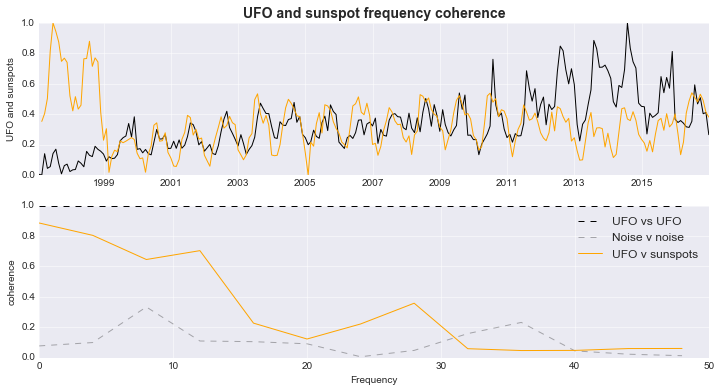

In [35]:
# UFO Signal coherence with sunspot counts
nfft = 25
dt = 0.01
n = 1./dt
plt.figure(figsize=(12,6))

plt.subplot(211)
plt.title('UFO and sunspot frequency coherence', fontsize=14, fontweight='bold')
plt.plot(X, Y1,'k')
plt.plot(X, Y4,color='orange')
# plt.xlim(0,5)
plt.ylabel('UFO and sunspots')
# plt.grid(True)

plt.subplot(212)
# Sunspots for comparison
cxy, f = plt.cohere(Y1, Y1, nfft,n , color='k', alpha=1, linestyle='--', label='UFO vs UFO')
cxy, f = plt.cohere(noise, noise1, nfft,n , color='k', alpha=.3, linestyle='--', label='Noise v noise')
# UFO to sun
cxy, f = plt.cohere(Y1, Y4, nfft, n, color='orange', alpha=1, label='UFO v sunspots')
plt.ylabel('coherence')
plt.legend(loc='upper right')
plt.ylim(0,1)
plt.savefig('./imgs/UFOsunspots_freqCoherence.png')
plt.show()

In [30]:
# Granger test for Y2 x Y3
sig_noise = Y1 + noise
x1 = pd.DataFrame([Y1,Y4])
x1 = x1.transpose()
x2 = pd.DataFrame([Y1,sig_noise])
x2 = x2.transpose()
x3 = pd.DataFrame([noise,noise1])
x3 = x3.transpose()
maxlag = 24
gr1 = statsmodels.tsa.stattools.grangercausalitytests(x1, maxlag, verbose=False)
gr2 = statsmodels.tsa.stattools.grangercausalitytests(x2, maxlag, verbose=False)
gr3 = statsmodels.tsa.stattools.grangercausalitytests(x3, maxlag, verbose=False)

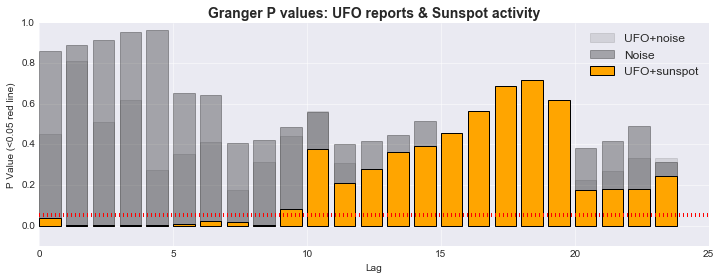

In [34]:
#Plot the granger p values 
resd1 = {}
for i in range(0,maxlag):
    resd1[i] = gr1[i+1][0]['params_ftest'][1]
    
resd2 = {}
for i in range(0,maxlag):
    resd2[i] = gr2[i+1][0]['params_ftest'][1]
    
resd3 = {}
for i in range(0,maxlag):
    resd3[i] = gr3[i+1][0]['params_ftest'][1]
    
pvals1 = pd.Series(resd1)
pvals2 = pd.Series(resd2)
pvals3 = pd.Series(resd3)

plt.figure(figsize=(12,4))
plt.ylim(-0.1,1)

plt.bar(pvals2.index,pvals2,color='k',alpha=.1, label='UFO+noise')
plt.bar(pvals3.index,pvals3,color='k',alpha=.3, label="Noise")
plt.bar(pvals1.index,pvals1, color='orange', label='UFO+sunspot')
plt.axhline(0.05, ls=':', c='r', linewidth=4)
plt.legend(loc='upper right')
plt.xlabel('Lag')
plt.ylabel('P Value (<0.05 red line)')
plt.title('Granger P values: UFO reports & Sunspot activity', fontsize=14, fontweight='bold')
plt.savefig('./imgs/UFOsunspots_granger_pvals.png')